# About Dataset
#### Content
India needs a boost to its economy that can also simultaneously transform local businesses. In order to support Indian brands, 'Vocal for Local' campaign was started in India. Emphasizing on a self-reliant, or ‘aatmanirbhar’, India, the Indian government has asked that products not just be made in India, but also for the promotion of local brands, manufacturing, and supply chain.

This dataset comprises of 2500+ reviews of about 100+ Indian Products pertaining to categories like hair and skin care products, clothes, electronic gadgets, etc from Amazon.

##### Column Description
asin : Amazon Standard Identification Number - a unique id for each product on Amazon

name : name of the product

date : date on which review was posted

rating : rating given to the product ( out of 5 )

review: review given to the product

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.metrics import accuracy_score


In [ ]:
# dataset link ----https://www.kaggle.com/datasets/nehaprabhavalkar/indian-products-on-amazon/data

In [2]:
os.getcwd()

'd:\\Codebook\\NLP\\review_'

In [3]:
data=pd.read_csv('amazon_vfl_reviews.csv')

In [4]:
data.head(10)

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
5,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-30,4,I have been using this product for some time n...
6,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-28,1,I purchased both oil and shampoo after watchin...
7,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-20,5,It's a very good product from mamaearth. The o...
8,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-11-15,3,Why are you showing onion oil benefits in your...
9,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-30,5,I used it only one time so I can't say about h...


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  2776 non-null   int64 
 1   review  2776 non-null   object
dtypes: int64(1), object(1)
memory usage: 43.5+ KB


In [5]:
data.name.value_counts()

name
Tata-Tea-Gold-500g                               60
Society-Tea-Masala-Jar-250g                      40
Godrej-Security-Solutions-SEEC9060-Electronic    40
Himalaya-Baby-Shampoo-400-ml                     40
Himalaya-Moisturizing-Aloe-Vera-200ml            40
                                                 ..
Patanjali-UHT-Milk-1000-ml                       10
Indiana-Frutti-Cherries-Frooti-Multicolor         6
Amul-Cow-Ghee-500ml                               4
Tata-Tea-Premium-1-5kg                            2
Patanjali-Ayurved-Ltd-CORO-NIL-Tablet             2
Name: count, Length: 122, dtype: int64

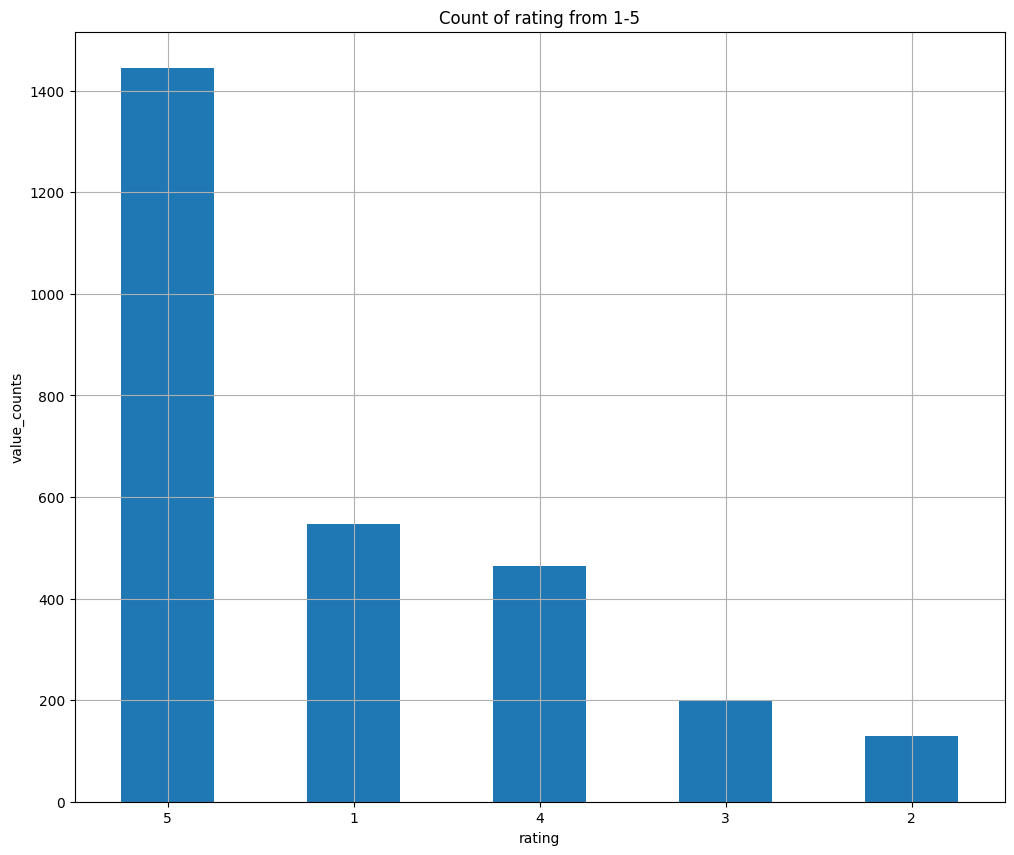

In [6]:
data.rating.value_counts().plot.bar(figsize=(12,10),title='Count of rating from 1-5')
plt.xlabel('rating')
plt.ylabel('value_counts')
plt.xticks(rotation=0)
plt.grid()

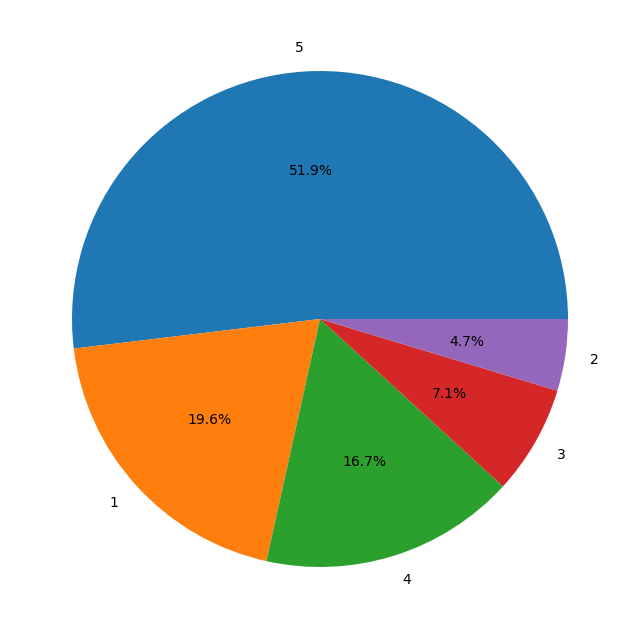

In [7]:
### checking value counts of 'Rating' in Percentage
plt.figure(figsize=(8,10))
df=data['rating'].value_counts()
keys=df.keys().to_list()
count=df.to_list()
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.show()

### Conclusion- 
From the above we can say that the maximum Rating has been given as 5 to the indian products i.e, approximatly 52% but still there are many customers who are not happy with the products and have given low rating

### Feature Engineering

In [8]:
# Separating the 'brands' from the 'product names'
data['brands']=data['name'].str.split('-').apply(lambda x: x[0])

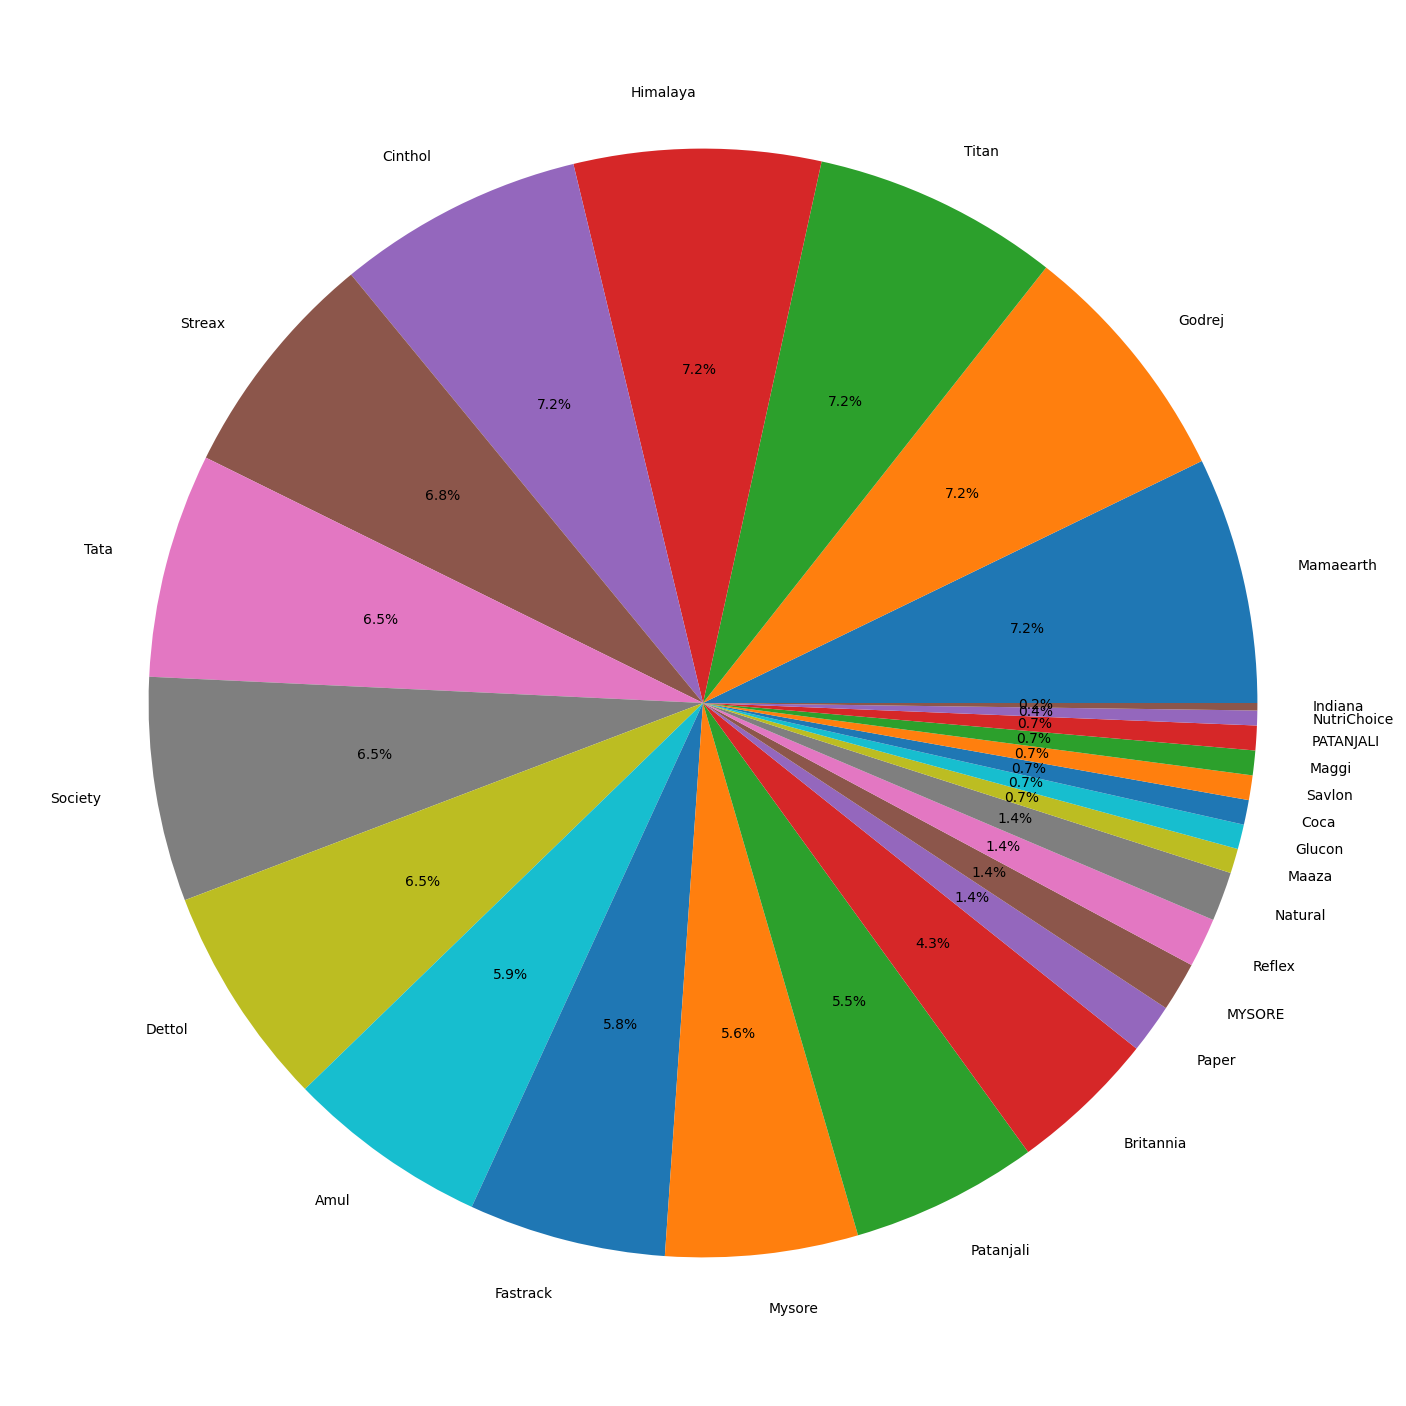

In [9]:
### checking value counts of 'brands' in Percentage
plt.figure(figsize=(18,18))
df=data['brands'].value_counts()
keys=df.keys().to_list()
count=df.to_list()
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.show()

In [10]:
data.columns

Index(['asin', 'name', 'date', 'rating', 'review', 'brands'], dtype='object')

In [11]:
# Dropping some of the columns since not required 
data.drop(['brands','asin', 'name', 'date'],axis=1,inplace=True)

In [12]:
data.head(10)

,rating,review
0,1,I bought this hair oil after viewing so many g...
1,5,Used This Mama Earth Newly Launched Onion Oil ...
2,1,So bad product...My hair falling increase too ...
3,1,Product just smells similar to navarathna hair...
4,5,I have been trying different onion oil for my ...
5,4,I have been using this product for some time n...
6,1,I purchased both oil and shampoo after watchin...
7,5,It's a very good product from mamaearth. The o...
8,3,Why are you showing onion oil benefits in your...
9,5,I used it only one time so I can't say about h...


In [13]:
# checking for null values
data.isnull().sum()

rating    0
review    6
dtype: int64

In [14]:
# getting the index with null values
data[data.review.isnull()].index

Index([2248, 2258, 2631, 2634, 2641, 2644], dtype='int64')

In [15]:
# Reoving all the null values
data.dropna(axis=0,inplace=True)

In [16]:
data.isnull().sum()

rating    0
review    0
dtype: int64

In [17]:
# Reset the index 
data.reset_index(drop=True, inplace=True)
data.head(10)

,rating,review
0,1,I bought this hair oil after viewing so many g...
1,5,Used This Mama Earth Newly Launched Onion Oil ...
2,1,So bad product...My hair falling increase too ...
3,1,Product just smells similar to navarathna hair...
4,5,I have been trying different onion oil for my ...
5,4,I have been using this product for some time n...
6,1,I purchased both oil and shampoo after watchin...
7,5,It's a very good product from mamaearth. The o...
8,3,Why are you showing onion oil benefits in your...
9,5,I used it only one time so I can't say about h...


In [19]:
stopword = nltk.corpus.stopwords.words('english')

In [22]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores=[]
sentiment_score_flag = []
for text in data['review']:
        sentimentResults = sentiment_model.polarity_scores(text)
        sentiment_score = sentimentResults["compound"]
        #print(sentimentResults)
        #The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.
        sentiment_scores.append(sentiment_score)
        # marking the sentiments as positive, negative and neutral 
        if sentimentResults['compound'] >= 0.05 : 
            sentiment_score_flag.append('positive')
  
        elif sentimentResults['compound'] <= - 0.05 : 
            sentiment_score_flag.append('negative')
  
        else : 
            sentiment_score_flag.append('neutral')
            
data['scores']=sentiment_scores
data['scoreStatus'] = sentiment_score_flag

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
data

,rating,review,scores,scoreStatus
0,1,I bought this hair oil after viewing so many g...,0.9102,positive
1,5,Used This Mama Earth Newly Launched Onion Oil ...,0.8856,positive
2,1,So bad product...My hair falling increase too ...,-0.4224,negative
3,1,Product just smells similar to navarathna hair...,-0.9577,negative
4,5,I have been trying different onion oil for my ...,0.8597,positive
...,...,...,...,...
2771,5,Long lasting freshness throughout the day.,0.0000,neutral
2772,5,My preferred soap,0.0000,neutral
2773,2,ठीक नहीं लगा,0.0000,neutral
2774,4,Super Product,0.5994,positive


In [24]:
df1=data.drop(['rating','scores'],axis=1)

# To Run File here

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.metrics import accuracy_score


In [5]:
# df1 = pd.read_csv('review_clean.csv')

In [25]:
df1.head()

,review,scoreStatus
0,I bought this hair oil after viewing so many g...,positive
1,Used This Mama Earth Newly Launched Onion Oil ...,positive
2,So bad product...My hair falling increase too ...,negative
3,Product just smells similar to navarathna hair...,negative
4,I have been trying different onion oil for my ...,positive


In [7]:
# positive_keywords = ['good', 'excellent', 'awesome', 'positive','fine']
# negative_keywords = ['bad', 'poor', 'terrible', 'negative']

# def label_sentiment(review):
#     for word in positive_keywords:
#         if word in review.lower():
#             return 'positive'
#     for word in negative_keywords:
#         if word in review.lower():
#             return 'negative'
#     return 'neutral'

# df1['Sentiment'] = df1['review'].apply(label_sentiment)

# # Display the updated DataFrame
# print(df1.head())

In [26]:
df1.columns

Index(['review', 'scoreStatus'], dtype='object')

In [27]:
df1.isnull().sum()

review         0
scoreStatus    0
dtype: int64

In [28]:
df1.dropna(axis=0,inplace=True)

In [29]:
# df1.to_csv('review_clean.csv',index=False)

In [31]:
df1.scoreStatus.value_counts()

scoreStatus
positive    2004
negative     536
neutral      236
Name: count, dtype: int64

In [ ]:
df1=data.drop(['rating','scores'],axis=1)

In [32]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
corpus = []

for index, row in df1.iterrows():
    review = re.sub('[^a-zA-Z]', ' ', row['review'])  # removing all characters other than alphabets
    review = review.lower()  # Lowering all cases
    review = review.split()  # Splitting the words
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]  # Removing stopwords
    review = ' '.join(review)
    corpus.append(review)


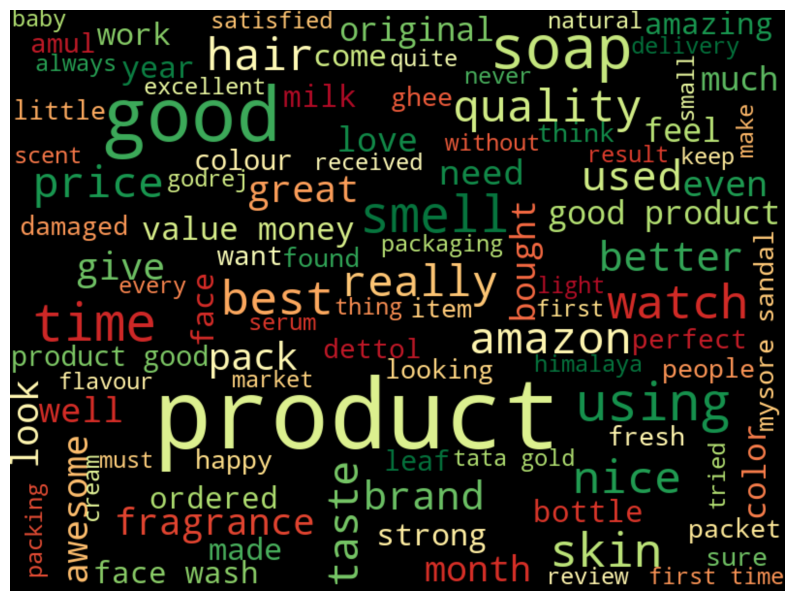

In [33]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 100,  
                       min_word_length = 4,
                       max_font_size = 100, 
                       background_color = 'black').generate(' '.join(corpus))


plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'quadric')
plt.axis('off')
plt.show()

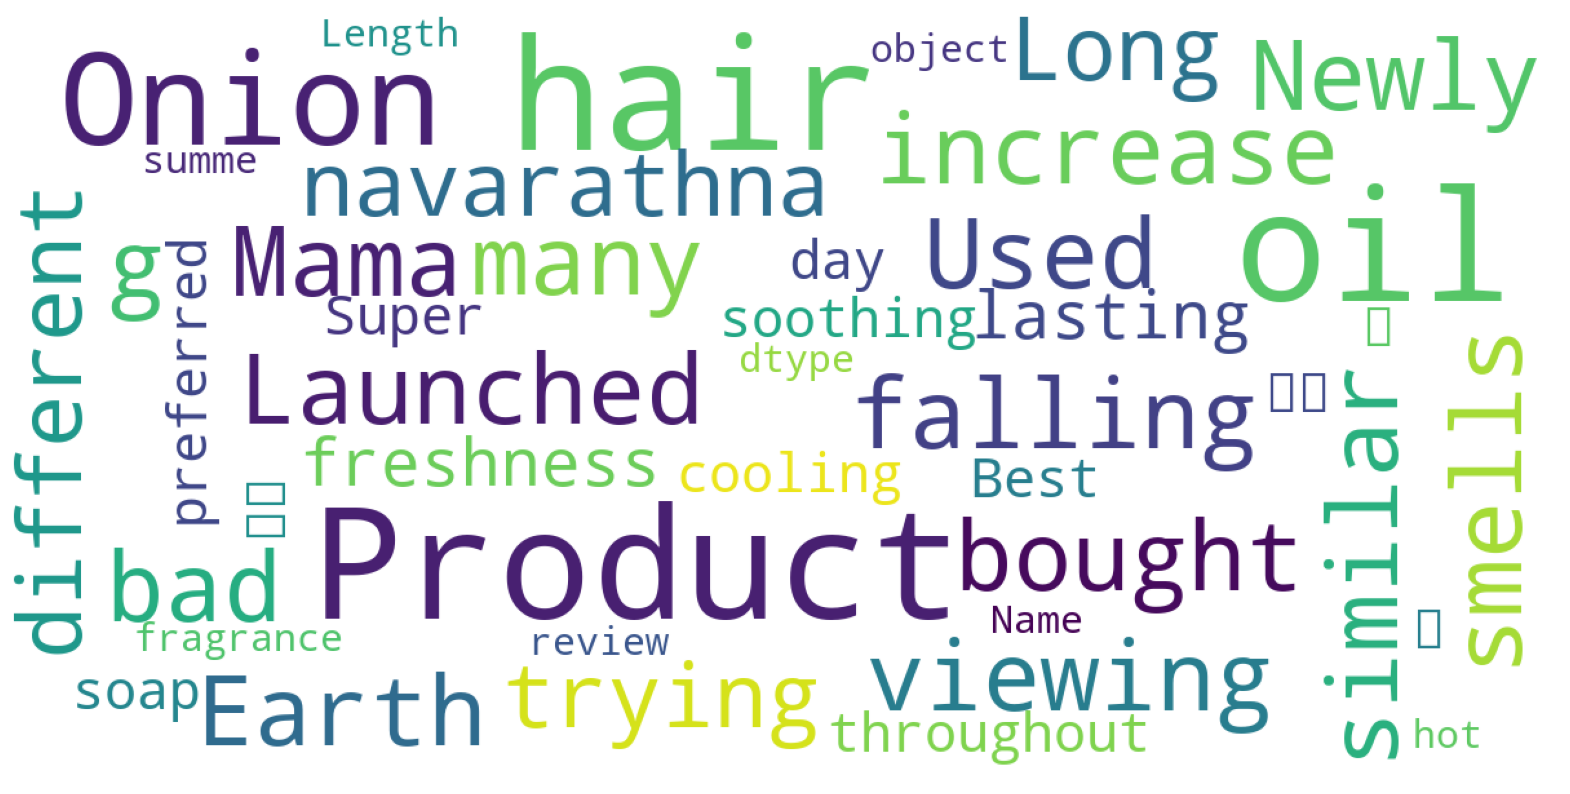

In [36]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df1["review"])

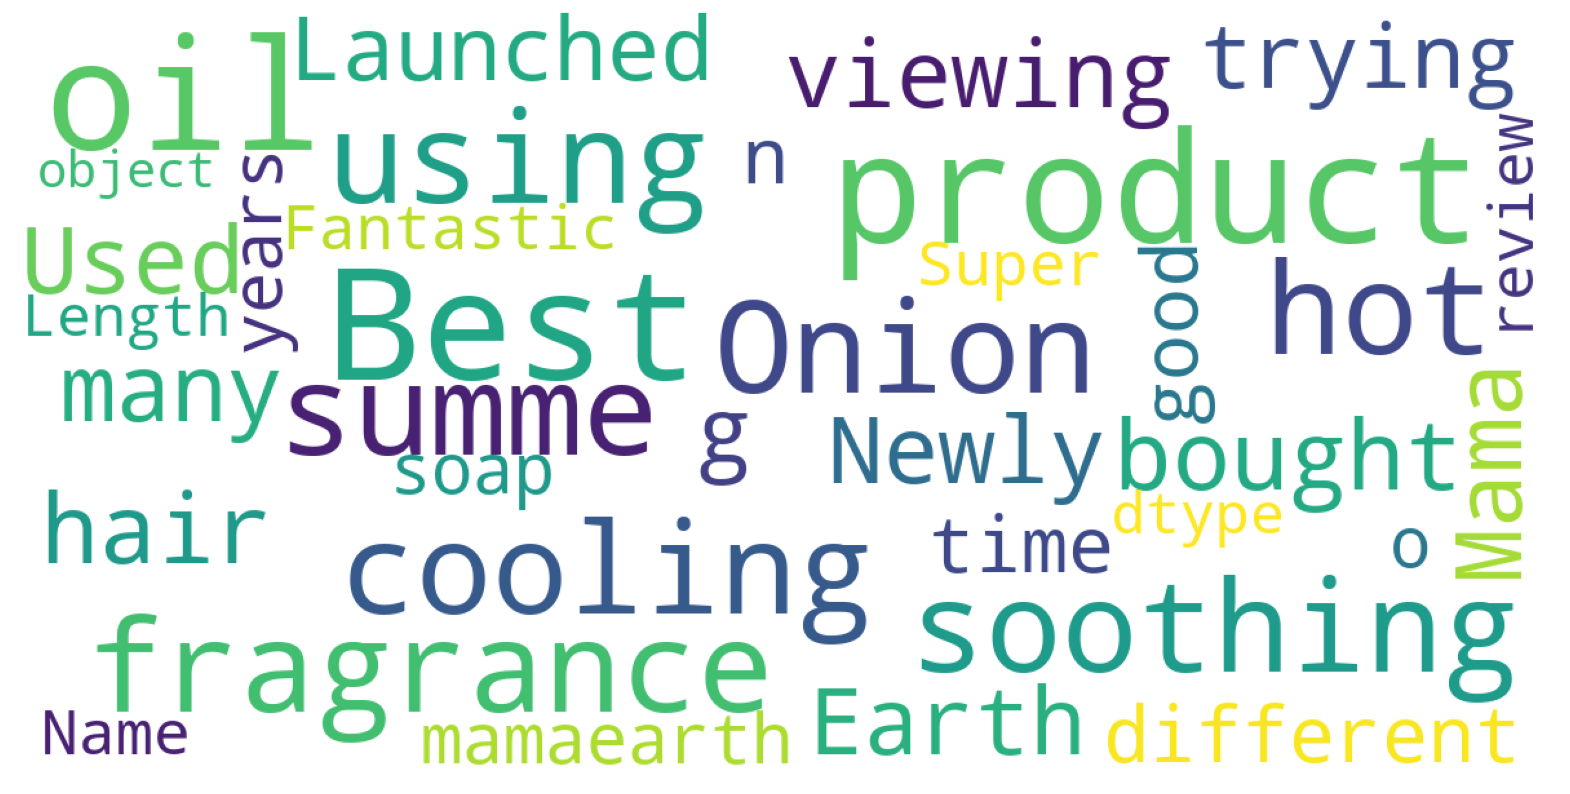

In [38]:
# print wordcloud
positiveReviews_df =df1.loc[df1['scoreStatus'] == "positive"]
show_wordcloud(positiveReviews_df["review"])

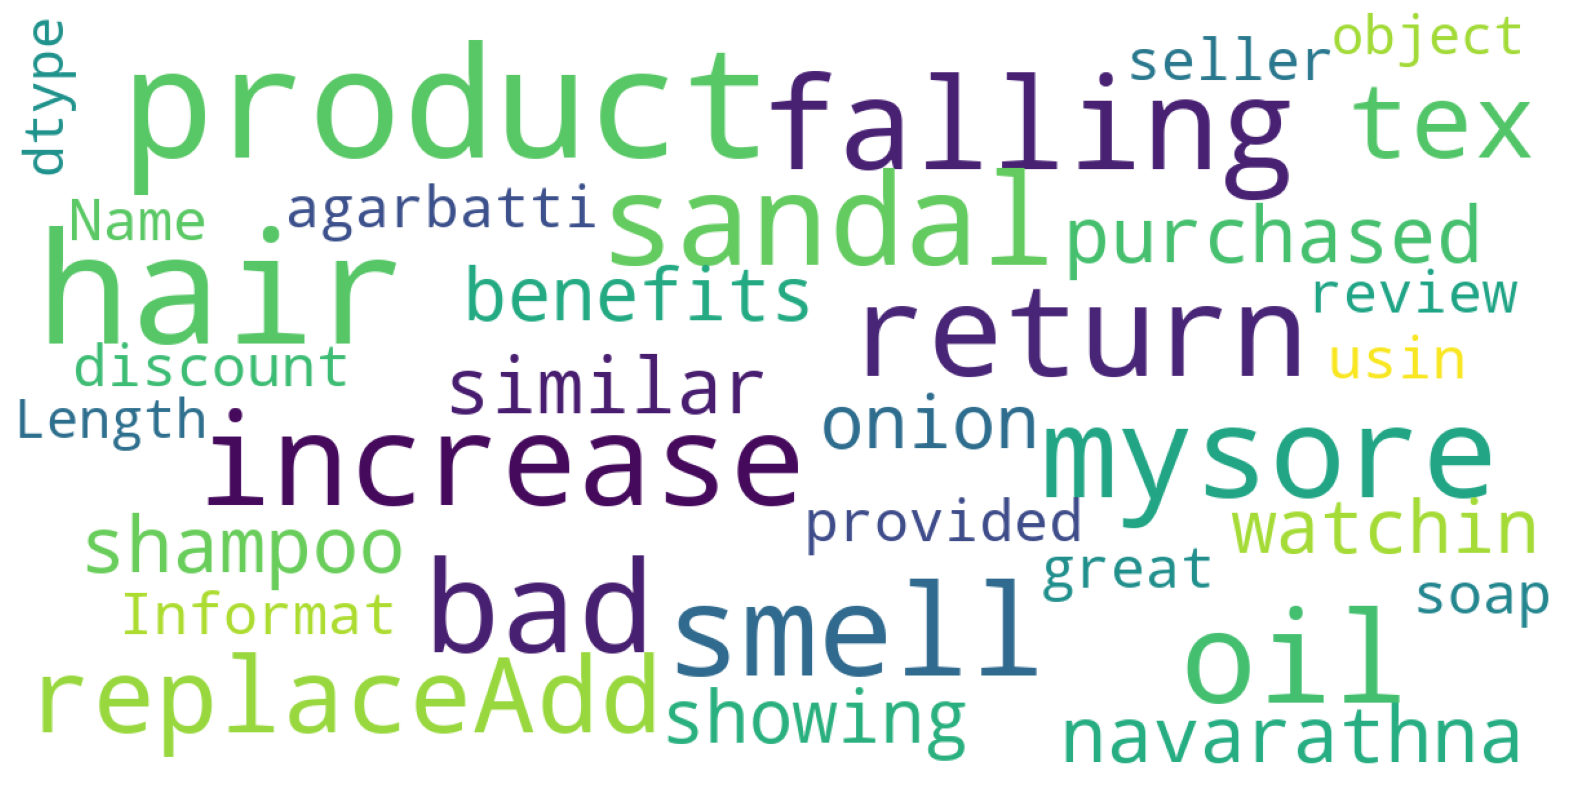

In [40]:

negativeReviews_df =df1.loc[df1['scoreStatus'] == "negative"]
show_wordcloud(negativeReviews_df["review"])

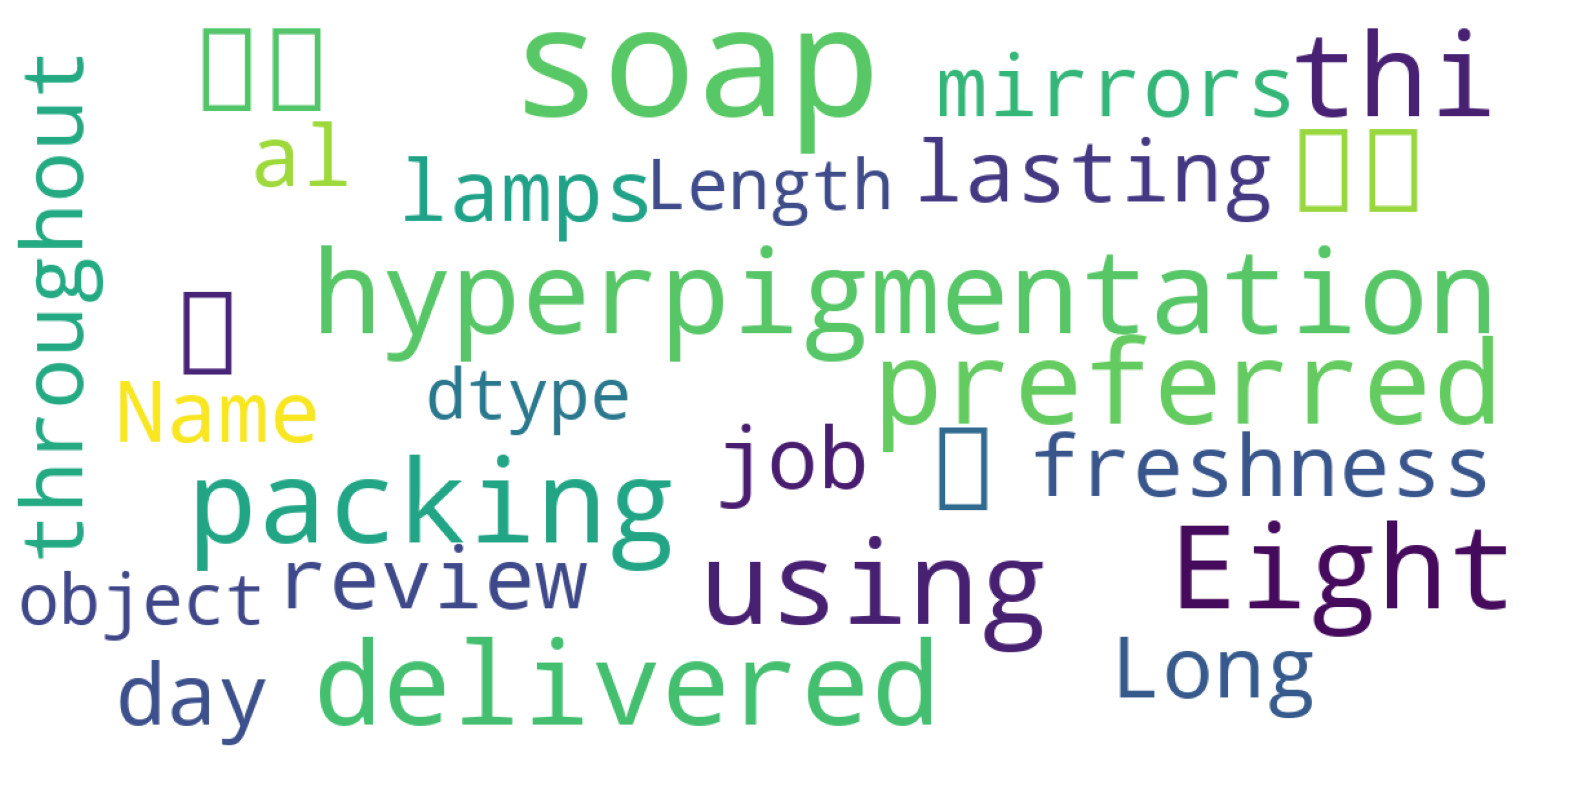

In [43]:

neutralReviews_df =df1.loc[df1['scoreStatus'] == "neutral"]
show_wordcloud(neutralReviews_df["review"])

In [44]:
df1

,review,scoreStatus
0,I bought this hair oil after viewing so many g...,positive
1,Used This Mama Earth Newly Launched Onion Oil ...,positive
2,So bad product...My hair falling increase too ...,negative
3,Product just smells similar to navarathna hair...,negative
4,I have been trying different onion oil for my ...,positive
...,...,...
2771,Long lasting freshness throughout the day.,neutral
2772,My preferred soap,neutral
2773,ठीक नहीं लगा,neutral
2774,Super Product,positive
